In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('salary_data_cleaned.csv')

In [4]:
df.head(5)

,Company Name,Competitors,Founded,Headquarters,Industry,Job Description,Job Title,Location,Rating,Revenue,...,same_location,age,python_yn,tableau_yn,aws_yn,spark_yn,computer_science_yn,ml_yn,sql_yn,excel_yn
0,Rubikloud Technologies\n3.7,-1,2013,"Toronto, Canada",Enterprise Software & Network Solutions,"What We Are Building:\n\nAt Rubikloud, we are ...",Data Scientist,Toronto,3.7,Unknown / Non-Applicable,...,1,7,1,0,0,1,1,1,1,0
1,Home Trust\n3.1,-1,1977,"Toronto, Canada",Lending,"Company Profile\n\nHome Capital Group Inc., to...",Data Scientist,Toronto,3.1,₹10 to ₹50 billion (INR),...,1,43,1,0,0,1,0,0,0,1
2,realtor.com\n2.7,"Zillow, Trulia, Redfin",1993,"Santa Clara, CA",Internet,"At realtor.com, we process terabytes of data e...",Staff Data Scientist,Vancouver,2.7,Unknown / Non-Applicable,...,0,27,1,0,0,1,1,1,1,1
3,Langan Engineering and Environmental Services\...,-1,1970,"Parsippany, NJ",Architectural & Engineering Services,Work for an Industry Leader\nOutstanding Oppor...,Environmental Scientist or Biologist - 5 to 10...,Calgary,4.0,₹10 to ₹50 billion (INR),...,0,50,0,0,0,0,0,0,0,1
4,Sonatype\n4.7,-1,2008,"Fulton, MD",Computer Hardware & Software,We are 350+ employees from diverse backgrounds...,Backend Engineer Data Team - 100% Remote - Canada,Canada,4.7,₹5 to ₹10 billion (INR),...,0,12,0,0,1,1,1,0,0,0


In [5]:
df.columns


Index(['Company Name', 'Competitors', 'Founded', 'Headquarters', 'Industry',
       'Job Description', 'Job Title', 'Location', 'Rating', 'Revenue',
       'Salary Estimate', 'Sector', 'Size', 'Type of ownership', 'min_salary',
       'max_salary', 'avg_salary', 'company', 'headquarters_location',
       'same_location', 'age', 'python_yn', 'tableau_yn', 'aws_yn', 'spark_yn',
       'computer_science_yn', 'ml_yn', 'sql_yn', 'excel_yn'],
      dtype='object')

In [6]:
## Job title and seniority 
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
    

In [7]:
df['title'] = df['Job Title'].apply(title_simplifier)
df.title.value_counts()

na                211
analyst           164
data engineer     138
data scientist    134
mle                36
manager            26
director            9
Name: title, dtype: int64

In [9]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        529
senior    187
jr          2
Name: seniority, dtype: int64

In [10]:
##  Fix Location Canada

df['Location'] = df.Location.apply(lambda x: x if x.lower() != 'canada' else 'na')
df.Location.value_counts()

Toronto                 191
Montreal                106
Vancouver               103
Ottawa                   39
Mississauga              39
Calgary                  28
Burnaby                  11
Markham                  11
Edmonton                 10
Brampton                 10
Welwyn                   10
Waterloo                  9
Ontario                   8
Laval                     8
na                        8
Kitchener                 7
Winnipeg                  7
Chalk River               6
Kingston                  5
Richmond                  5
Saint-Laurent             5
Victoria                  5
Saskatoon                 4
Guelph                    4
Oakville                  4
London                    4
Cochin                    4
Cambridge                 3
Halifax                   3
Fort St. John             3
                       ... 
Coquitlam                 1
Souris                    1
British Columbia          1
New Westminster           1
Kirkland            

In [11]:
##  Job description length 
df['job_desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['job_desc_len']

0      3707
1      3274
2      3284
3      3571
4      3954
5      3964
6      4813
7      9208
8      3998
9      3181
10     4336
11     3582
12     4055
13     3025
14     4556
15     8435
16     5216
17     3991
18     7581
19     3582
20     5026
21     5578
22     4466
23     1387
24     5832
25     3714
26     3679
27     1322
28     2889
29     3480
       ... 
688    3798
689    6254
690    3515
691    5144
692    5270
693    4109
694    5160
695    4376
696    5920
697    4493
698    8884
699    6461
700    4894
701    9466
702    4583
703    5046
704    2904
705    8453
706    5770
707    5846
708    4206
709    4051
710    5513
711    7537
712    2397
713    3596
714    3499
715    5176
716    1717
717    2122
Name: job_desc_len, Length: 718, dtype: int64

In [12]:
##  Competitor count

df['comp_count'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['comp_count']

0      0
1      0
2      3
3      0
4      0
5      0
6      3
7      0
8      3
9      0
10     0
11     0
12     0
13     0
14     3
15     0
16     0
17     3
18     2
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     3
29     0
      ..
688    0
689    3
690    3
691    0
692    0
693    0
694    0
695    0
696    2
697    2
698    3
699    0
700    0
701    0
702    0
703    0
704    0
705    0
706    3
707    3
708    0
709    0
710    0
711    3
712    0
713    3
714    0
715    0
716    0
717    0
Name: comp_count, Length: 718, dtype: int64

In [13]:
df.columns

Index(['Company Name', 'Competitors', 'Founded', 'Headquarters', 'Industry',
       'Job Description', 'Job Title', 'Location', 'Rating', 'Revenue',
       'Salary Estimate', 'Sector', 'Size', 'Type of ownership', 'min_salary',
       'max_salary', 'avg_salary', 'company', 'headquarters_location',
       'same_location', 'age', 'python_yn', 'tableau_yn', 'aws_yn', 'spark_yn',
       'computer_science_yn', 'ml_yn', 'sql_yn', 'excel_yn', 'title',
       'seniority', 'job_desc_len', 'comp_count'],
      dtype='object')

In [14]:
#remove new line from job title
df['company'] = df['company'].apply(lambda x: x.replace('\n',''))
df['company']

0                             Rubikloud Technologies
1                                         Home Trust
2                                        realtor.com
3      Langan Engineering and Environmental Services
4                                           Sonatype
5                             Rubikloud Technologies
6                                                TWG
7                                              Uni3T
8                                             Syniti
9                                              Asana
10                                           auticon
11                                              Citi
12                                      Jungle Scout
13                                     SkipTheDishes
14                                            Amazon
15                               Precision Nutrition
16                                      Label Engine
17                                               RBC
18                            Suncor Energy Se

In [15]:
df.describe()

,Founded,Rating,min_salary,max_salary,avg_salary,same_location,age,python_yn,tableau_yn,aws_yn,spark_yn,computer_science_yn,ml_yn,sql_yn,excel_yn,job_desc_len,comp_count
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,1366.651811,3.150557,73.864903,100.715877,87.290390,0.367688,30.977716,0.545961,0.153203,0.201950,0.267409,0.410864,0.380223,0.486072,0.495822,4049.796657,0.803621
std,913.595860,1.733481,26.252499,27.372528,26.150919,0.482512,47.051941,0.498230,0.360434,0.401735,0.442916,0.492334,0.485780,0.500154,0.500331,2056.988999,1.297627
min,-1.000000,-1.000000,44.000000,64.000000,55.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000,0.000000
25%,-1.000000,3.100000,54.250000,82.500000,69.125000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2759.000000,0.000000
50%,1974.000000,3.700000,70.000000,102.000000,86.000000,0.000000,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3707.500000,0.000000
75%,2004.000000,4.000000,87.000000,110.000000,95.500000,1.000000,34.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4848.000000,2.000000
max,2020.000000,5.000000,168.000000,198.000000,183.000000,1.000000,226.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18258.000000,3.000000


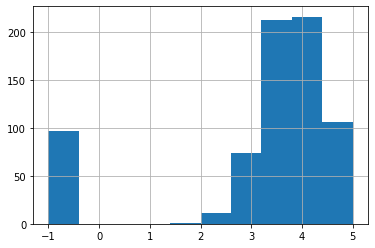

In [14]:
df.Rating.hist()

In [16]:
df.head()

,Company Name,Competitors,Founded,Headquarters,Industry,Job Description,Job Title,Location,Rating,Revenue,...,aws_yn,spark_yn,computer_science_yn,ml_yn,sql_yn,excel_yn,title,seniority,job_desc_len,comp_count
0,Rubikloud Technologies\n3.7,-1,2013,"Toronto, Canada",Enterprise Software & Network Solutions,"What We Are Building:\n\nAt Rubikloud, we are ...",Data Scientist,Toronto,3.7,Unknown / Non-Applicable,...,0,1,1,1,1,0,data scientist,na,3707,0
1,Home Trust\n3.1,-1,1977,"Toronto, Canada",Lending,"Company Profile\n\nHome Capital Group Inc., to...",Data Scientist,Toronto,3.1,₹10 to ₹50 billion (INR),...,0,1,0,0,0,1,data scientist,na,3274,0
2,realtor.com\n2.7,"Zillow, Trulia, Redfin",1993,"Santa Clara, CA",Internet,"At realtor.com, we process terabytes of data e...",Staff Data Scientist,Vancouver,2.7,Unknown / Non-Applicable,...,0,1,1,1,1,1,data scientist,na,3284,3
3,Langan Engineering and Environmental Services\...,-1,1970,"Parsippany, NJ",Architectural & Engineering Services,Work for an Industry Leader\nOutstanding Oppor...,Environmental Scientist or Biologist - 5 to 10...,Calgary,4.0,₹10 to ₹50 billion (INR),...,0,0,0,0,0,1,na,na,3571,0
4,Sonatype\n4.7,-1,2008,"Fulton, MD",Computer Hardware & Software,We are 350+ employees from diverse backgrounds...,Backend Engineer Data Team - 100% Remote - Canada,na,4.7,₹5 to ₹10 billion (INR),...,1,1,1,0,0,0,na,na,3954,0


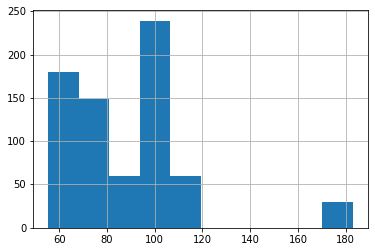

In [16]:
df.avg_salary.hist()

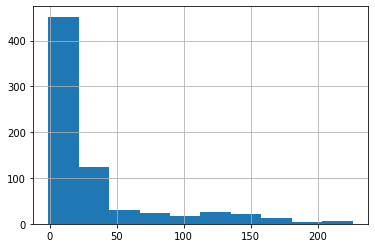

In [17]:
df.age.hist()

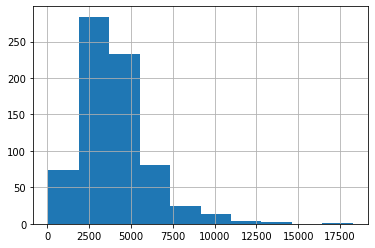

In [18]:
df.job_desc_len.hist()

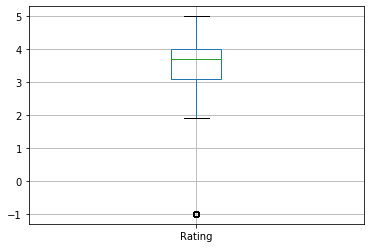

In [19]:
df.boxplot(column = ['Rating'])

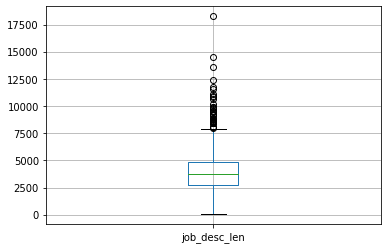

In [20]:
df.boxplot(column = ['job_desc_len'])

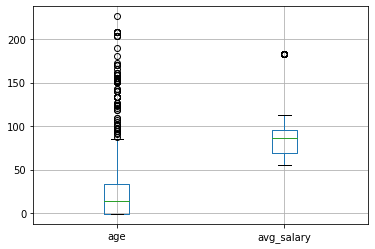

In [21]:
df.boxplot(column = ['age','avg_salary'])

In [22]:
df[['age','avg_salary','Rating','job_desc_len']].corr()

,age,avg_salary,Rating,job_desc_len
age,1.000000,-0.081019,0.236076,0.156046
avg_salary,-0.081019,1.000000,-0.076126,0.106217
Rating,0.236076,-0.076126,1.000000,0.130009
job_desc_len,0.156046,0.106217,0.130009,1.000000


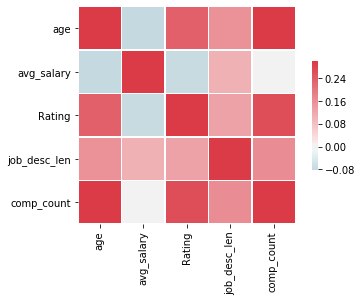

In [23]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','job_desc_len','comp_count']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [24]:
cmap=sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

In [25]:
df.columns

Index(['Company Name', 'Competitors', 'Founded', 'Headquarters', 'Industry',
       'Job Description', 'Job Title', 'Location', 'Rating', 'Revenue',
       'Salary Estimate', 'Sector', 'Size', 'Type of ownership', 'min_salary',
       'max_salary', 'avg_salary', 'company', 'headquarters_location',
       'same_location', 'age', 'python_yn', 'tableau_yn', 'aws_yn', 'spark_yn',
       'computer_science_yn', 'ml_yn', 'sql_yn', 'excel_yn', 'title',
       'seniority', 'job_desc_len', 'comp_count'],
      dtype='object')

In [26]:
df_cat = df[['Location','headquarters_location', 'Size', 'Type of ownership', 'Industry','Sector','Revenue'
             ,'same_location','python_yn','tableau_yn','aws_yn','spark_yn','computer_science_yn', 
             'ml_yn','sql_yn','excel_yn','title','seniority']]

graph for Location: total = 75


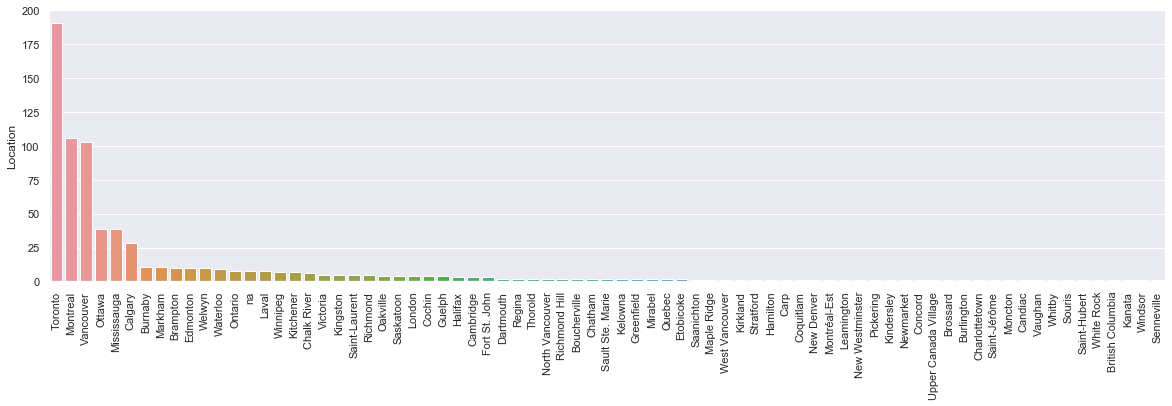

graph for headquarters_location: total = 149


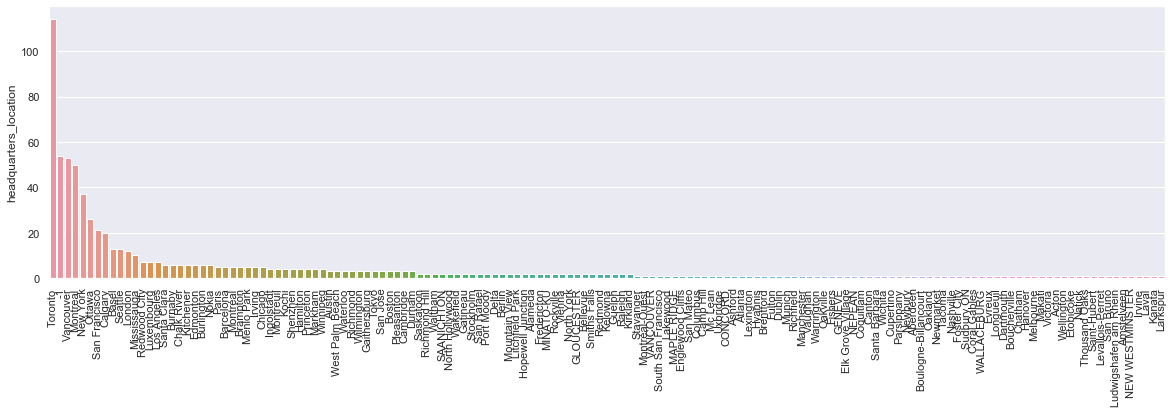

graph for Size: total = 9


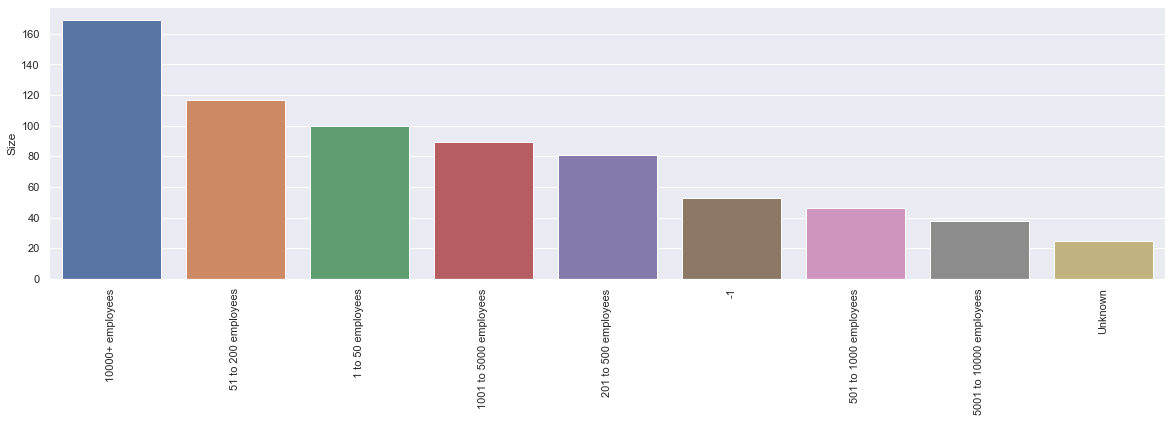

graph for Type of ownership: total = 13


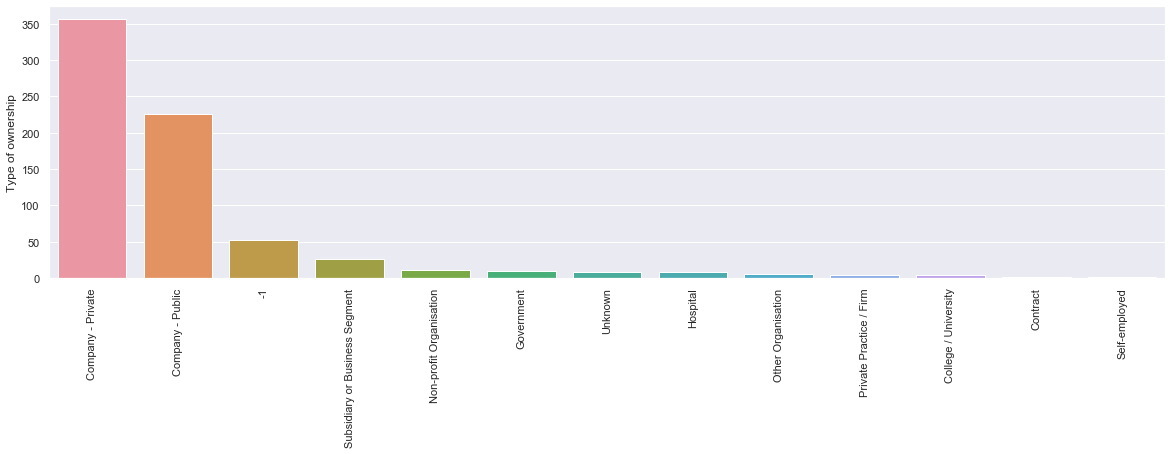

graph for Industry: total = 65


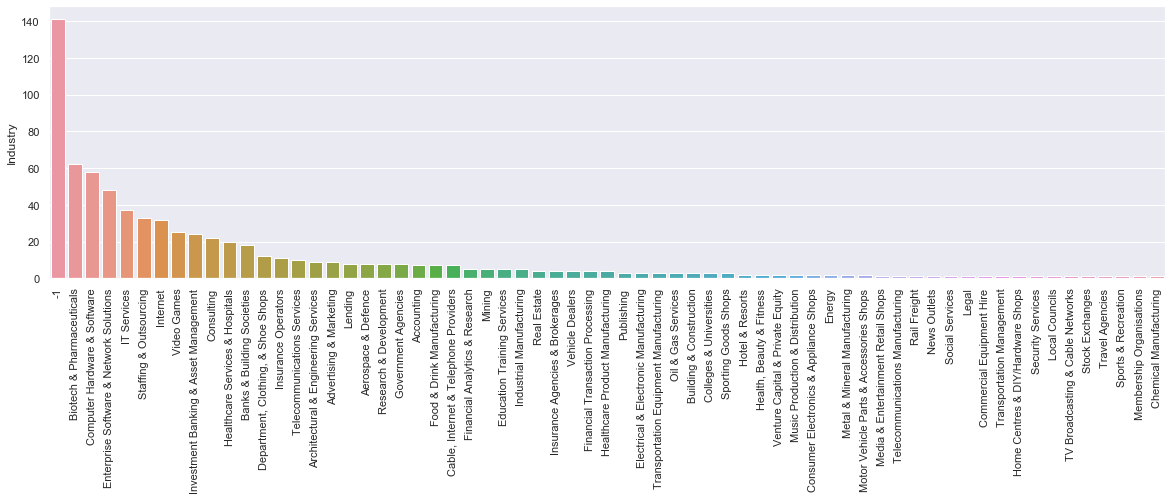

graph for Sector: total = 24


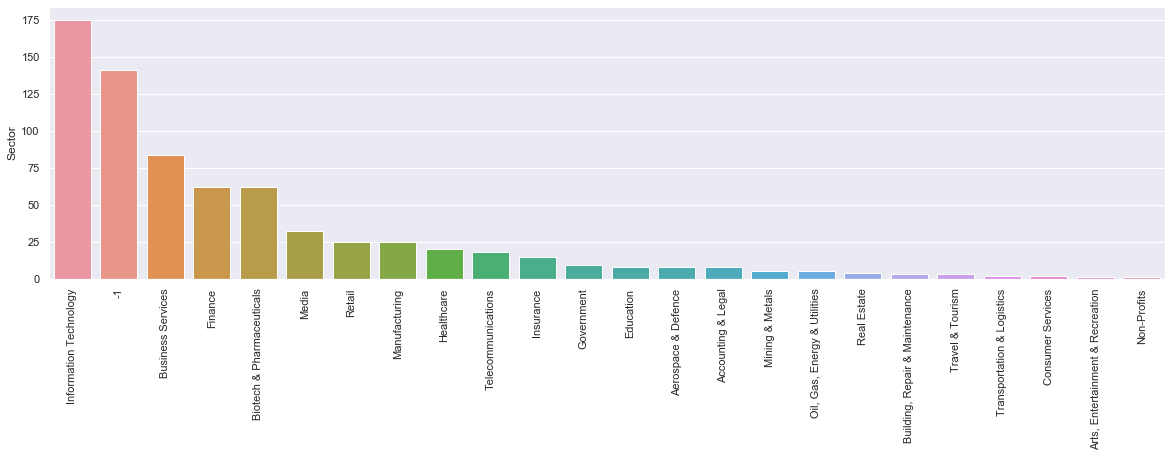

graph for Revenue: total = 13


/Users/nikhitaputta/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nikhitaputta/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8377 missing from current font.
  font.set_text(s, 0, flags=flags)


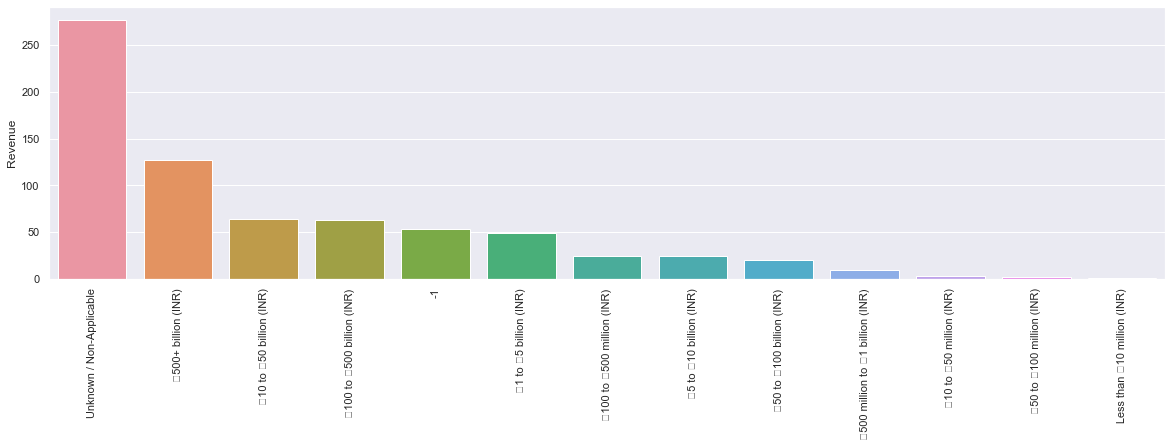

graph for same_location: total = 2


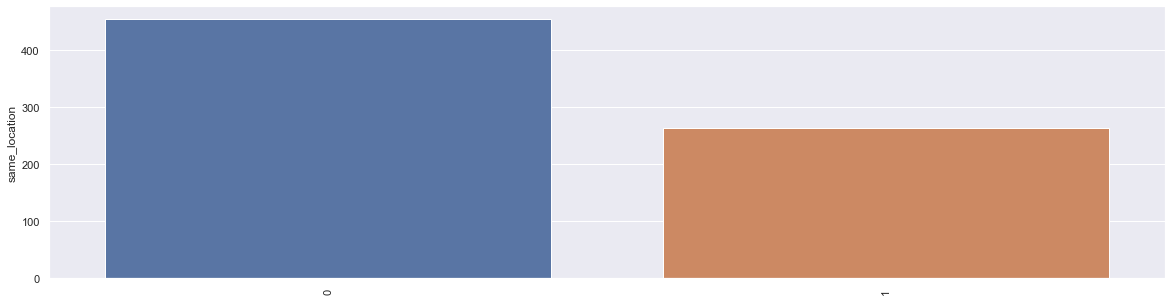

graph for python_yn: total = 2


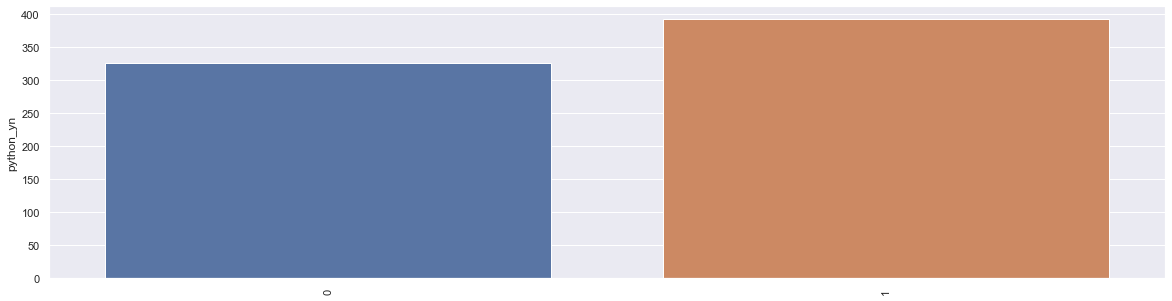

graph for tableau_yn: total = 2


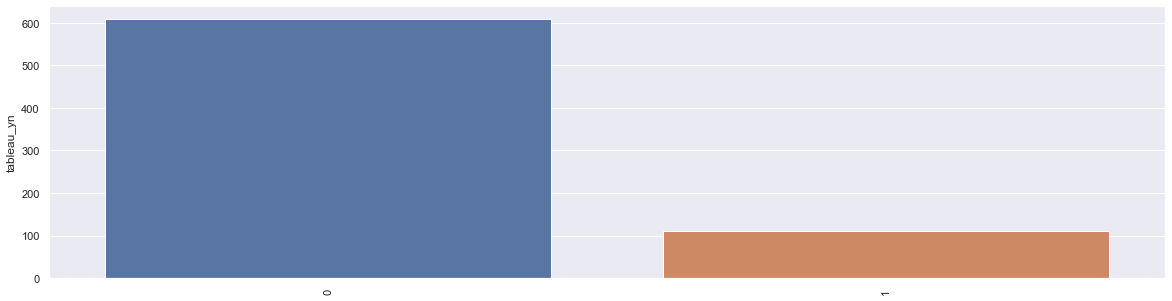

graph for aws_yn: total = 2


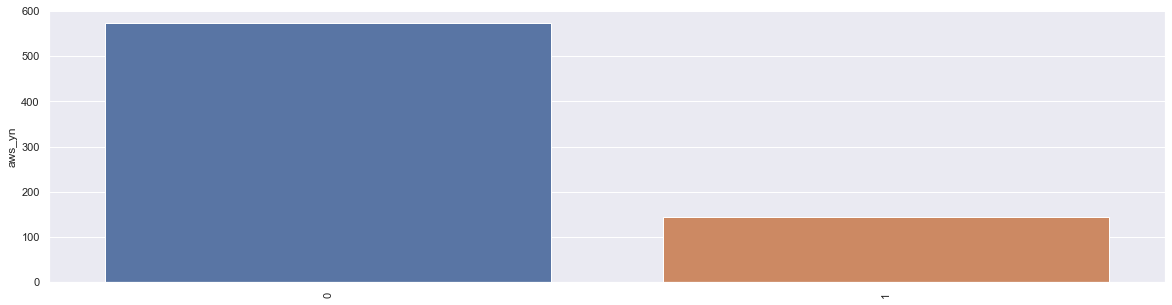

graph for spark_yn: total = 2


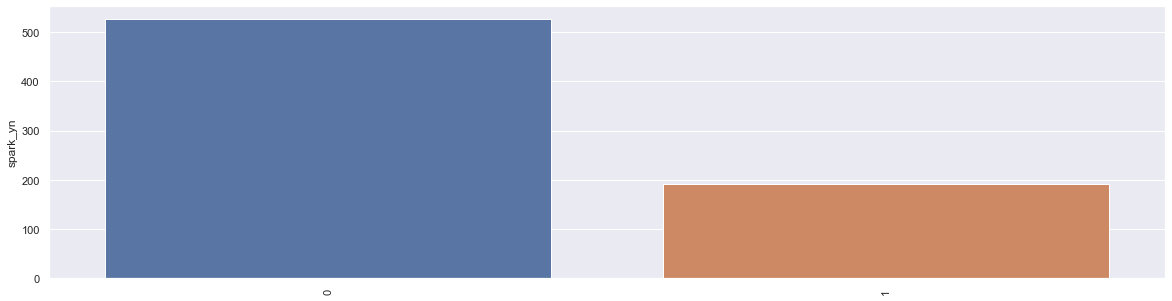

graph for computer_science_yn: total = 2


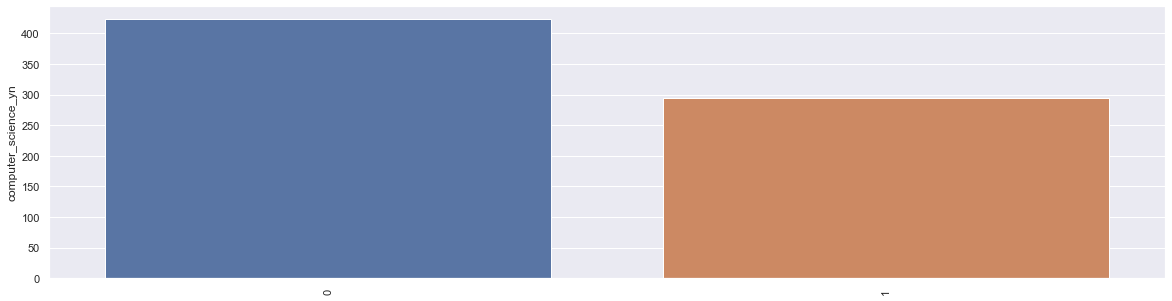

graph for ml_yn: total = 2


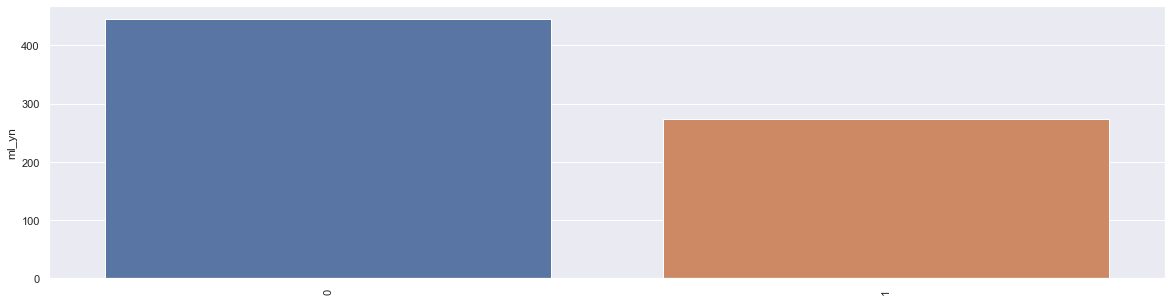

graph for sql_yn: total = 2


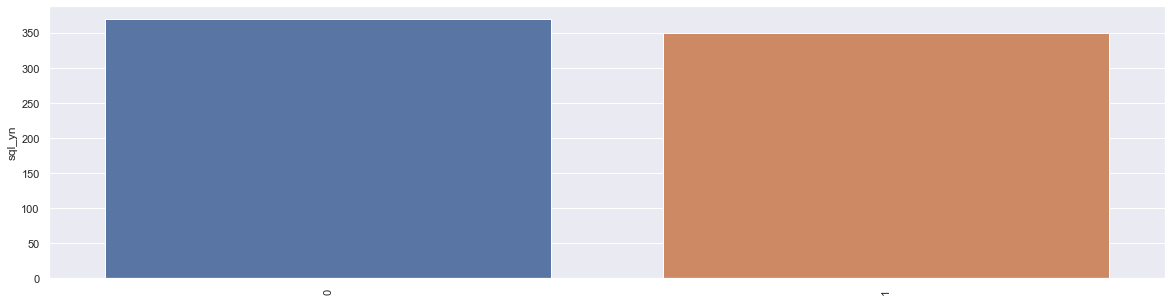

graph for excel_yn: total = 2


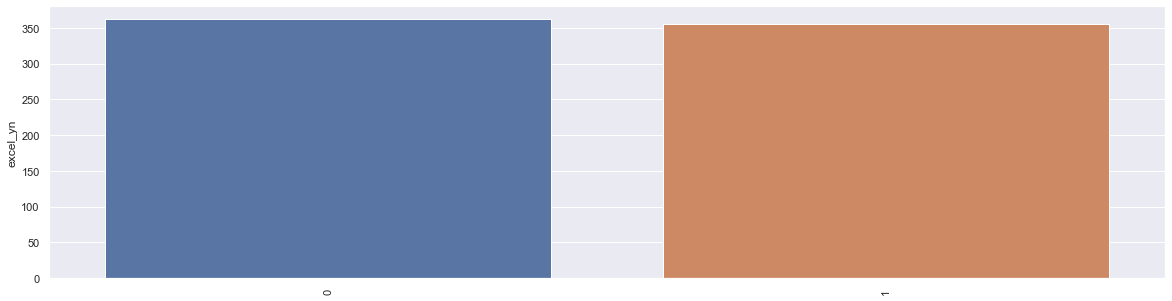

graph for title: total = 7


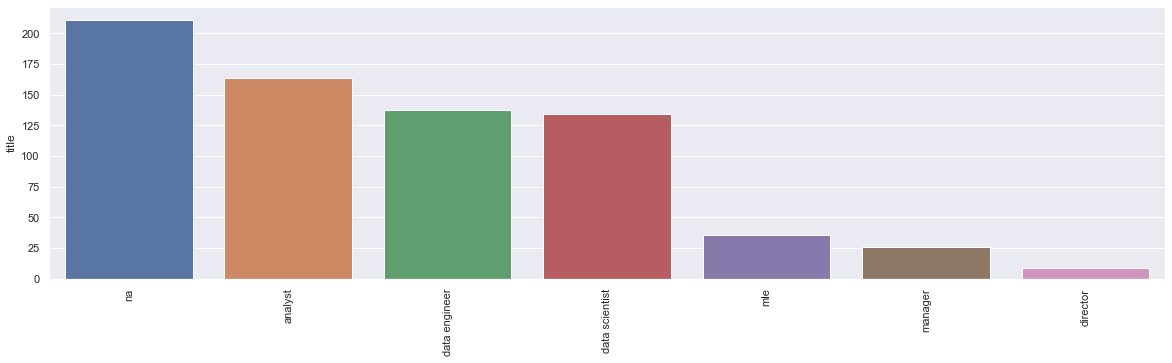

graph for seniority: total = 3


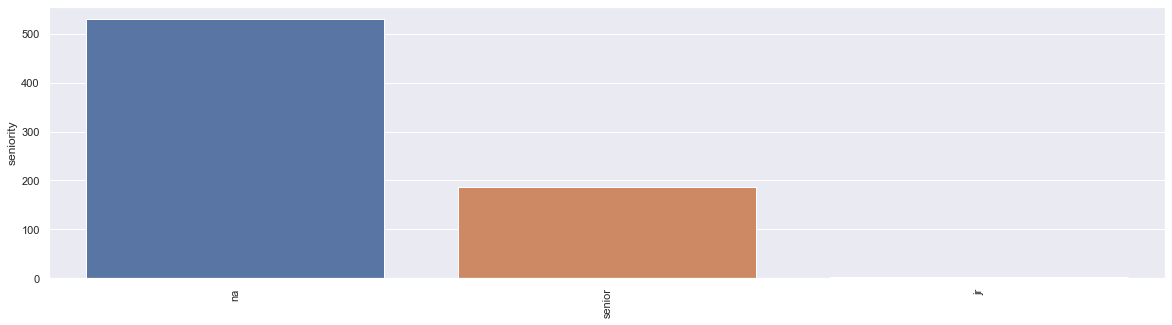

In [27]:
sns.set(rc={'figure.figsize':(20,5)})
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


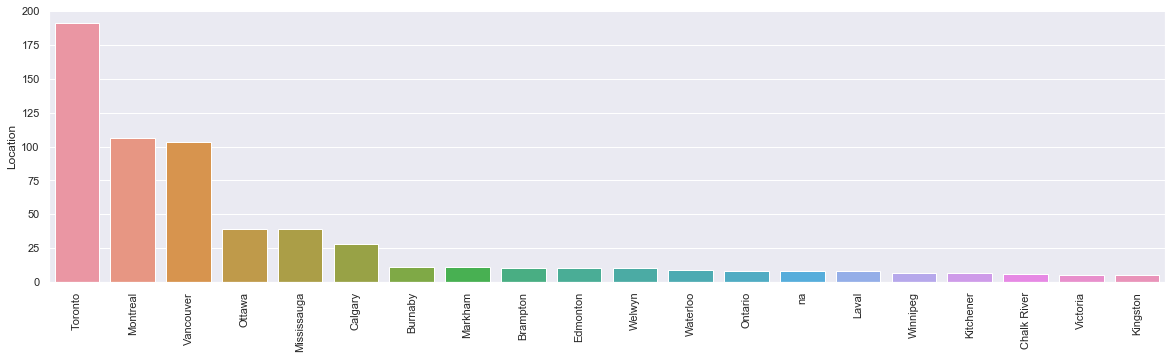

graph for headquarters_location: total = 20


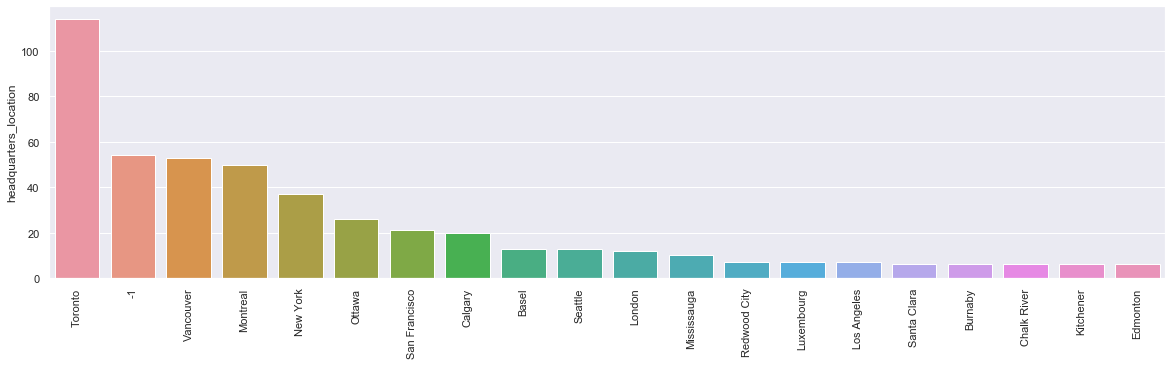

In [28]:
for i in df_cat[['Location','headquarters_location']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [29]:
df.columns

Index(['Company Name', 'Competitors', 'Founded', 'Headquarters', 'Industry',
       'Job Description', 'Job Title', 'Location', 'Rating', 'Revenue',
       'Salary Estimate', 'Sector', 'Size', 'Type of ownership', 'min_salary',
       'max_salary', 'avg_salary', 'company', 'headquarters_location',
       'same_location', 'age', 'python_yn', 'tableau_yn', 'aws_yn', 'spark_yn',
       'computer_science_yn', 'ml_yn', 'sql_yn', 'excel_yn', 'title',
       'seniority', 'job_desc_len', 'comp_count'],
      dtype='object')

In [30]:
pd.pivot_table(df, index = 'title', values = 'avg_salary')


,avg_salary
title,
analyst,83.939024
data engineer,86.452899
data scientist,86.832090
director,93.222222
manager,97.096154
mle,87.819444
na,89.182464


In [31]:
pd.pivot_table(df, index = ['title','seniority'], values = 'avg_salary')


avg_salary
title          seniority            
analyst        na          84.806569
               senior      79.537037
data engineer  na          87.095745
               senior      85.079545
data scientist jr          74.000000
               na          91.064706
               senior      79.604167
director       na          92.785714
               senior      94.750000
manager        na          97.270833
               senior      95.000000
mle            na          87.465517
               senior      89.285714
na             jr          72.500000
               na          88.993464
               senior      89.982456

In [32]:
pd.pivot_table(df, index = ['Location','title'], values = 'avg_salary').sort_values(['title','avg_salary'], ascending = True)


,,avg_salary
Location,title,
Hamilton,analyst,56.000000
Saint-Jérôme,analyst,56.000000
West Vancouver,analyst,56.000000
Kingston,analyst,63.500000
Stratford,analyst,63.500000
Winnipeg,analyst,64.000000
Burnaby,analyst,64.250000
Saskatoon,analyst,72.500000
Waterloo,analyst,72.500000


In [33]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [34]:
pd.pivot_table(df, index = ['Location','title'], values = 'avg_salary', aggfunc = 'count').sort_values('Location', ascending = False)

avg_salary
Location             title                     
na                   na                       5
                     data scientist           1
                     data engineer            1
                     analyst                  1
Winnipeg             analyst                  1
                     na                       4
                     data scientist           1
                     data engineer            1
Windsor              data scientist           1
White Rock           na                       1
Whitby               na                       1
West Vancouver       analyst                  1
Welwyn               na                       4
                     manager                  1
                     director                 2
                     data scientist           3
Waterloo             data engineer            2
                     analyst                  1
                     na                       1
                     data scientist           5
Victoria             na                       2
                     data scientist           1
                     analyst                  2
Vaughan              na                       1
Vancouver            na                      19
                     mle                      8
                     manager                  5
                     director                 1
                     data scientist          19
                     data engineer           28
                     analyst                 23
Upper Canada Village analyst                  1
Toronto              director                 3
                     data engineer           51
                     data scientist          40
                     analyst                 33
                     manager                  7
                     na                      48
                     mle                      9
Thorold              na                       1
                     data scientist           1
Stratford            analyst                  1
Souris               director                 1
Senneville           na                       1
Sault Ste. Marie     na                       2
Saskatoon            data scientist           1
                     analyst                  1
                     na                       2
Saint-Laurent        na                       5
Saint-Jérôme         analyst                  1
Saint-Hubert         analyst                  1
Saanichton           na                       1
Richmond Hill        mle                      1
                     data scientist           1
Richmond             analyst                  2
                     na                       3
Regina               analyst                  2
Quebec               data engineer            1
                     data scientist           1
Pickering            data scientist           1
Ottawa               analyst                  7
                     na                       8
                     mle                      3
                     manager                  2
                     director                 2
                     data scientist          11
                     data engineer            6
Ontario              data scientist           1
                     analyst                  3
                     na                       3
                     manager                  1
Oakville             na                       3
                     analyst                  1
North Vancouver      na                       1
                     analyst                  1
Newmarket            analyst                  1
New Westminster      na                       1
New Denver           data scientist           1
Montréal-Est         analyst                  1
Montreal             na                      31
                     mle                      7
                     manager                  3
     

In [35]:
pd.pivot_table(df[df.title == 'analyst'], index = 'Location', values = 'avg_salary').sort_values('avg_salary', ascending = False)


,avg_salary
Location,
Newmarket,183.000000
na,103.500000
Maple Ridge,103.500000
Concord,99.000000
Calgary,96.333333
Cochin,95.000000
Oakville,95.000000
Boucherville,95.000000
Moncton,94.500000


In [36]:
df.columns

Index(['Company Name', 'Competitors', 'Founded', 'Headquarters', 'Industry',
       'Job Description', 'Job Title', 'Location', 'Rating', 'Revenue',
       'Salary Estimate', 'Sector', 'Size', 'Type of ownership', 'min_salary',
       'max_salary', 'avg_salary', 'company', 'headquarters_location',
       'same_location', 'age', 'python_yn', 'tableau_yn', 'aws_yn', 'spark_yn',
       'computer_science_yn', 'ml_yn', 'sql_yn', 'excel_yn', 'title',
       'seniority', 'job_desc_len', 'comp_count'],
      dtype='object')

In [37]:
df_pivots = df[['Industry', 'Sector', 'Revenue', 'comp_count', 'python_yn', 'computer_science_yn', 'ml_yn',
        'sql_yn','tableau_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'Type of ownership','avg_salary']]

In [38]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Industry
                                         avg_salary
Industry                                           
Security Services                        112.500000
TV Broadcasting & Cable Networks         111.500000
Chemical Manufacturing                   111.500000
Financial Transaction Processing         110.500000
Architectural & Engineering Services     106.444444
Membership Organisations                 103.500000
Energy                                   103.500000
Insurance Agencies & Brokerages          101.375000
Motor Vehicle Parts & Accessories Shops   99.250000
Biotech & Pharmaceuticals                 98.241935
Social Services                           98.000000
Advertising & Marketing                   96.222222
Venture Capital & Private Equity          95.250000
Transportation Management                 95.000000
Financial Analytics & Research            94.500000
Music Production & Distribution           92.750000
Food & Drink Manufacturing                91.142857
Col

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [40]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

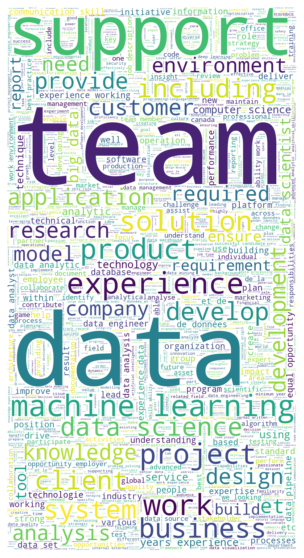

In [41]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [1]:
df.head()

NameError: name 'df' is not defined

In [17]:
df.to_csv('eda_data.csv')